In [1]:
import pandas as pd
df=pd.read_csv('c:/data/ozone/ozone2.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


In [2]:
X = df[['Solar.R','Wind','Temp']]   # 독립변수
y = df['Ozone']                     # 종속변수

In [3]:
# 학습용과 검증용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [4]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_shape=(len(X_train.columns),), activation='relu', name='input')) # 입력층
model.add(Dense(4, activation='relu', name='hidden-1'))                                   # 은닉층-1
model.add(Dense(2, activation='relu', name='hidden-2'))                                   # 은닉층-2
model.add(Dense(1, name='output'))                                                        # 출력층(함등함수)
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 8)                 32        
                                                                 
 hidden-1 (Dense)            (None, 4)                 36        
                                                                 
 hidden-2 (Dense)            (None, 2)                 10        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

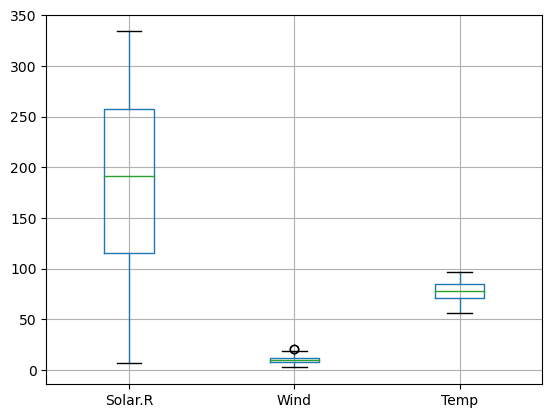

In [5]:
# 독립변수 스케일링
X_train.boxplot()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

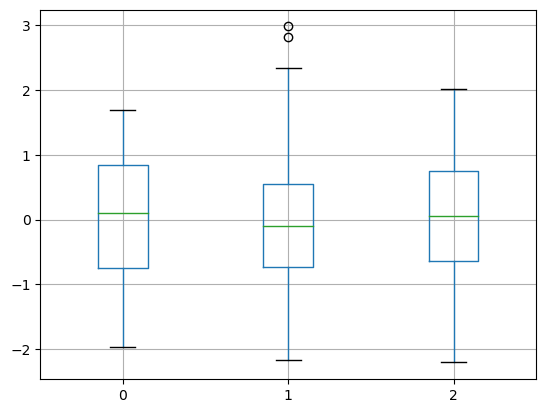

In [7]:
# 스케일링 한 후
import matplotlib.pyplot as plt
X_train_scaled.boxplot()
plt.show()

In [8]:
# 딥러닝
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50) # 조기학습종료 기준
hist = model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
4/4 [==============================] - 1s 56ms/step - loss: 2711.8469 - mse: 2711.8469 - mae: 41.8591 - val_loss: 1998.8416 - val_mse: 1998.8416 - val_mae: 38.0857
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 2711.1357 - mse: 2711.1357 - mae: 41.8461 - val_loss: 1998.2406 - val_mse: 1998.2406 - val_mae: 38.0753
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 2710.5161 - mse: 2710.5161 - mae: 41.8351 - val_loss: 1997.6936 - val_mse: 1997.6936 - val_mae: 38.0656
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 2709.9314 - mse: 2709.9314 - mae: 41.8237 - val_loss: 1997.1774 - val_mse: 1997.1774 - val_mae: 38.0564
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 2709.3767 - mse: 2709.3767 - mae: 41.8134 - val_loss: 1996.6707 - val_mse: 1996.6707 - val_mae: 38.0473
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 2708.8015 - mse: 2708.8015 - mae: 41.8026 - val_loss:

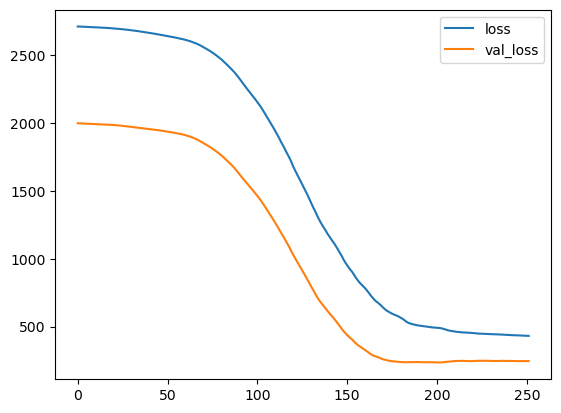

In [9]:
# 결과 시각화
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

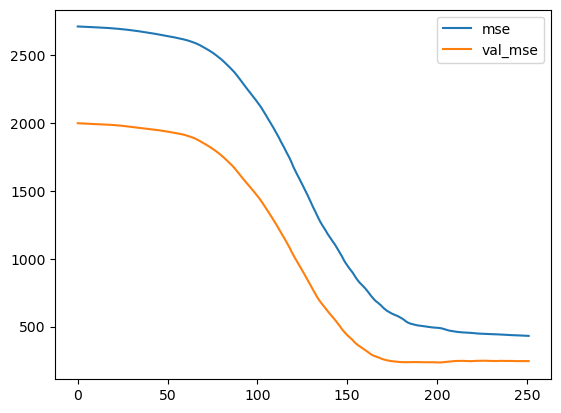

In [10]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse','val_mse'])
plt.show()

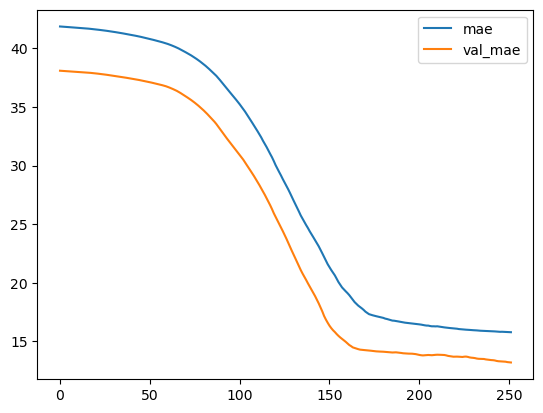

In [11]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [12]:
# 평가
scores = model.evaluate(X_train_scaled, y_train)
print(scores)

scores = model.evaluate(X_test_scaled, y_test)
print(scores)

4/4 [==============================] - 0s 0s/step - loss: 393.8551 - mse: 393.8551 - mae: 15.2551
[393.8551025390625, 393.8551025390625, 15.255146980285645]
1/1 [==============================] - 0s 23ms/step - loss: 308.3147 - mse: 308.3147 - mae: 13.1263
[308.3146667480469, 308.3146667480469, 13.126328468322754]


In [13]:
# R-squared 값
from sklearn.metrics import r2_score
pred = model.predict(X_test_scaled)
r2_score(y_test, pred)

1/1 [==============================] - 0s 73ms/step


0.46740795111034794